# Lab 7 - Projectile Motion III: Uncertainty
        June 14, 2018
        
[<< Table of Contents](index.html)

### Turn the procedural code from last week into a reusable Class:

In [14]:
import numpy as np
class Struct: pass

class Simulator:
    def __init__(self, dt=0.001, gravity = -9.8): 
        self.g  = gravity  # m/s^2
        self.dt = dt       # s
        self.last_run = Struct();

    # Euler's Method for running a launch simulation
    def run(self, angle, velocity, height):
        fail_safe = 0;
        a    = angle     # degrees
        v    = velocity  # m/s 
        h    = height    # m
        time = [0]       # s
        x    = [0]       # m
        y    = [h]       # m
        vx   = [v * np.cos(np.radians(a))] # m/s
        vy   = [v * np.sin(np.radians(a))] # m/s
        
        while (y[-1] > 0.0 or vy[-1] > 0.0):
            x    .append(x[-1] + vx[-1] * self.dt)
            y    .append(y[-1] + vy[-1] * self.dt)
            vx   .append(vx[-1])
            vy   .append(vy[-1] + self.g * self.dt)
            time .append(time[-1] + self.dt)
            
            fail_safe += 1
            if fail_safe > 100000: break
        
        return time, x,y, vy,vy

## P7.1 
Assign uncertainties to all relevant variables in your Euler’s method.

In [55]:
values = Struct()
values.angle    = 25  # degrees
values.velocity = 5.5 # m/s
values.gravity  = 9.8 # m/s^2
values.height   = 0.0 # m

uncertainty = Struct()
uncertainty.angle    = 5   # degrees
uncertainty.velocity = 0.5 # m/s
uncertainty.gravity  = 0.2 # m/s^2
uncertainty.height   = 0   # m

## P7.2 
Modify your code to look like the model code from the book. You’ll have to fill
in the missing code. Compare your results to those shown in figure 7.1.

Mean of the ranges:              2.38m
Standard deviation of ranges:    0.32
Max velocity in for y direction: 2.99m/s
Max height:                      0.46m


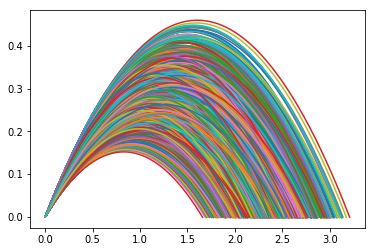

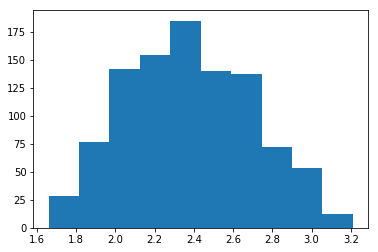

In [57]:
from random import uniform
from matplotlib import pyplot

num_trials = 1000
ranges = []
velocities = []
heights = []

pyplot.figure(1)

for i in range(num_trials):
    # Get a random numbers from a uniform distribution
    a = uniform(values.angle    - uncertainty.angle,    values.angle    + uncertainty.angle)
    v = uniform(values.velocity - uncertainty.velocity, values.velocity + uncertainty.velocity)
    g = uniform(values.gravity  - uncertainty.gravity,  values.gravity  + uncertainty.gravity)
    h = uniform(values.height   - uncertainty.height,   values.height   + uncertainty.height)
    
    # run a Euler's Method simulation on the launch
    sim = Simulator(gravity = -g,)
    time, x,y, vy,vy = sim.run(a, v, h)
    
    # plot and record results
    pyplot.plot(x,y)
    ranges.append(x[-1])
    velocities.append(max(max(vy), abs(min(vy))))
    heights.append(max(y))

print("Mean of the ranges:              {:.2f}m".format(np.mean(ranges)))
print("Standard deviation of ranges:    {:.2f}".format(np.std(ranges)))
print("Max velocity in for y direction: {:.2f}m/s".format(max(velocities)))
print("Max height:                      {:.2f}m".format(max(heights)))
pyplot.figure(2)
pyplot.hist(ranges)
pyplot.show()

> These match what is seen in the book

## P7.3 
Explain to your group, and in your lab notebook, how this code works. (Well
thought-out comments throughout your code will suffice)

> I wrote the code semantically, so that anyone could read it and understand what it does. For the parts that I did not do this, I added comments

## P7.4 
Plot the histogram of the ranges and print the mean and standard deviation.
Increase the number of trajectories until your histogram begins to take
shape.

> (see my results printed in [P7.2](#P7.2))

## P7.5 
Answer the following questions:

##### (a) Which input variable uncertainty affects the uncertainty in the range of your projectile the most? First hypothesize and then use your code to test your hypothesis.

_My hypothesis is that gravity's uncertainty will affect the results the most because it is nonlinear aggregate._

> I was incorrect, it was the angle. This makes since looking back because the angle effects how much energy is put into fighting against gravity.

##### (b) Which input variable uncertainty affects the uncertainty in the impact speed of your projectile themost? First hypothesize and then use your code to test your hypothesis.

_Since vx is constant, we will only consider vy. My hypothesis is that vy is effected the most by the angle uncertainty, because the angle changes how much energy is transfered in the y direction_

> I was correct


##### (c) Which input variable uncertainty affects the uncertainty in the max height of your projectile the most? First hypothesize and then use your code to test your hypothesis.

_My hypothesis is that the angle effects the max height the most, because it has effected everything else the most up to this point_

> I was correct here as well


# Take home thoughts

> As awlays, Python rules. I feel pretty proud of my implementation. I know `class`es are pretty advanced for **PH150** students, but they offer powerful maintainability of the code. Much of my code does not need comments because the classes and method names allow for us to read the code easily and imply as much meaning as comments would provide.

# Sign off

- Kyle West
- Landon Lewis